# Gallery 5: Combined Plots
Putting it all together: a sheet, curtain, profile and time series on the same figure. 

This notebook is used in combination with the [TUFLOW FV Python Toolbox](https://tfv.readthedocs.io/en/latest/index.html) (tfv) package. 
To follow along on your own computer, please download the demonstration notebooks from the [TUFLOW Downloads Page](https://www.tuflow.com/downloads/#utilities). Look for the TUFLOW FV Python Toolbox download.
Installation instructions are provided on our [TUFLOW FV Python Toolbox Wiki Page](https://fvwiki.tuflow.com/TUFLOW_FV_Python_Toolbox).

In [1]:
import xarray as xr  # We utilise xarray to do all the heavy lifting 
import tfv.xarray
from pathlib import Path # We'll also make use of the `pathlib` module to assist with managing file-paths, although this is entirely optional! 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### Open TUFLOW FV Model Result

In [2]:
model_folder = Path(r'..\..\data')
model_file = 'HYD_002.nc'

fv = xr.open_dataset(model_folder / model_file, decode_times=False).tfv
# fv  # Uncomment if you'd like to review the dataset

In [3]:
# User input - select variables and location for plotting
polyline = np.loadtxt(model_folder / 'polyline.csv', skiprows=1, delimiter=',')
loc = 'P2'
time = '2011-05-02 12:00'
var = 'SAL'

locs = {
    'P1' : (159.0758, -31.3638),
    'P2' : (159.0845,  -31.3727),
    'P3' : (159.0906,  -31.3814),
    'P4' : (159.1001,  -31.3948),
    'P5' : (159.1154,  -31.4032),
    'P6' : (159.1266,  -31.4105),
    'P7' : (159.1202,  -31.4165),
    'P8' : (159.1178,  -31.4236),
}


In [4]:
# Extract the timeseries and profile data
ts = fv.get_timeseries(['SAL'],locs)
prof = fv.get_profile(locs[loc],variables=['SAL'])

Extracting timeseries, please wait: 100%|███████████████████████████████████████████| 145/145 [00:00<00:00, 290.22it/s]


#### Plot Multiple Ways

Text(0.45, 0.98, 'Salinity Four Ways - A Salty Tale')

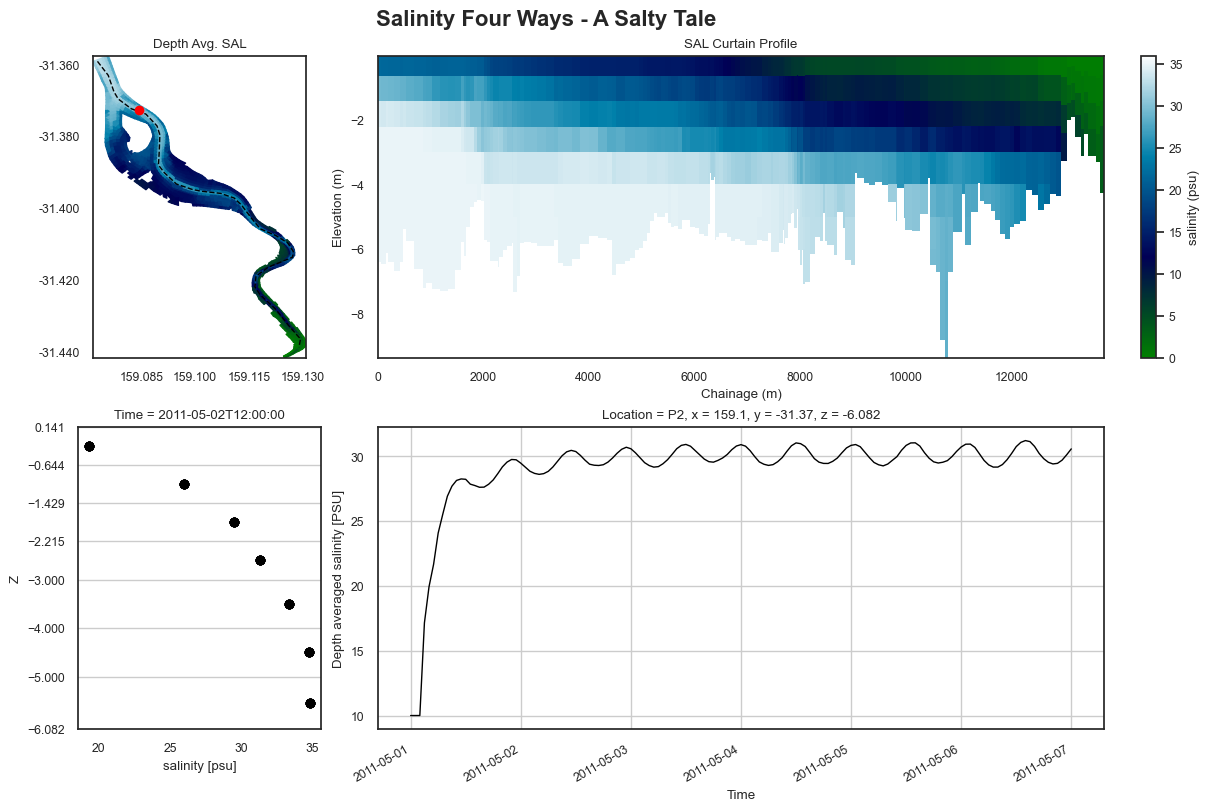

In [5]:
# Set Up Figure
from matplotlib.gridspec import GridSpec
sns.set(style='white', font_scale=0.8)
cspec =  dict(cmap='ocean', clim=(0, 36))

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8), gridspec_kw={'width_ratios': [1, 3]}, constrained_layout=True)
fv.plot(var, time, ax=ax1, colorbar=False, **cspec)
ax1.plot(polyline[:, 0], polyline[:, 1], lw=1, color='black', ls='--')
ax1.plot(locs['P2'][0], locs['P2'][1], 'o', color='red')
ax1.set_aspect('equal')
ax1.set_title(f'Depth Avg. {var}')

# Plot curtain
fv.plot_curtain(polyline, var, time, ax=ax2, ec='none', **cspec)
ax2.set_title(f'{var} Curtain Profile')

# Plot profile
prof.sel(Time=time).plot.scatter(x='SAL',y='Z', ax=ax3, color='black', lw=1)
zfaces = prof['layerface_Z'].sel(Time=time)
ax3.set_yticks(zfaces)
ax3.grid(axis='y')

# Plot timeseries
ts[var].sel(Location=loc).plot(ax=ax4, color='black', lw=1)
ax4.grid()
ax4.set_ylabel('Depth averaged salinity [PSU]')

fig.suptitle('Salinity Four Ways - A Salty Tale', fontweight='bold', x=0.45, fontsize=16)

This concludes the examples on combined plotting.